In [128]:
import pandas as pd
import math

df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:xlabel='Generation', ylabel='HP'>

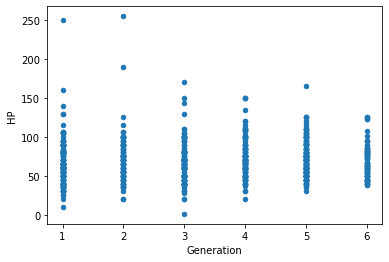

In [129]:
df = pd.DataFrame(df.sort_values('Speed'))
df.plot.scatter(x='Generation', y='HP')

In [130]:
df_gp = pd.DataFrame(df[['Generation', 'Speed']].groupby('Generation').sum().sort_values('Speed'))
df_gp['Speed']

Generation
6     5448
2     6552
4     8632
3    10708
5    11233
1    12049
Name: Speed, dtype: int64

In [131]:
media = df_gp['Speed'].mean()
print('mediana Speed: ',df_gp['Speed'].median())

print('média Speed: ', media)

mediana Speed:  9670.0
média Speed:  9103.666666666666


# Trimmed Mean
Trimmed Mean calcula a mediana após desconsiderar uma porcentagem dos maiores e menores valores de um rol de dados. 

.drop(**labels**=[min, max], **axis**=(0: linha / 1: coluna), **inplace**=(True: substitui o dataframe original / False: Cria uma cópia))

In [132]:
trimm_mean = pd.DataFrame(df_gp.drop(labels=[1, 6], axis=0, inplace=False))
# ou df_gp.iloc[1: 5]
trimm_mean_int = int(trimm_mean.sum() / 4)
print('Média Aparada: ', trimm_mean_int)
print('Média Amostral: ', round(media))

Média Aparada:  9281
Média Amostral:  9104


<AxesSubplot:ylabel='Density'>

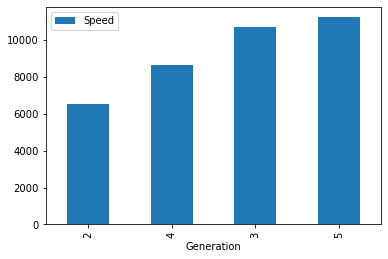

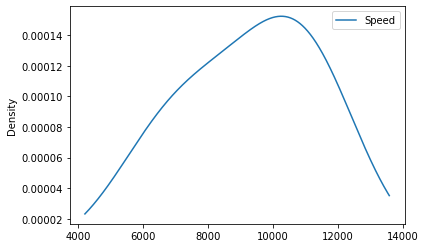

In [133]:
trimm_mean.plot(kind='bar')
trimm_mean.plot(kind='density')

# Medidas de Dispersão
Feita a partir do dataframe df_gp (df_generation_speed)

In [134]:
amplitude = int(df_gp['Speed'].max()) - int(df_gp['Speed'].min())
print('Amplitude: ', amplitude)

Amplitude:  6601


In [135]:
valores_speed = list(df_gp['Speed'])
sum = 0
print('valor      desvio\n')
for i in valores_speed:
    sum = sum + i
    print(f'[{i}]    ', round(i - media))


print('\nsomatório: ', sum)


valor      desvio

[5448]     -3656
[6552]     -2552
[8632]     -472
[10708]     1604
[11233]     2129
[12049]     2945

somatório:  54622


In [136]:
sum_pow = 0
for i in valores_speed:
    sum_pow = sum_pow + math.pow((i - media), 2)

print('Variância Amostral: ', round(sum_pow / (len(valores_speed))))

Variância Amostral:  5980051


In [137]:
desvio_padrao = math.sqrt(sum_pow / (len(valores_speed) - 1))
print('Desvio Padrão: ', round(desvio_padrao))

Desvio Padrão:  2679


In [138]:
display(round(media - desvio_padrao))

6425

<AxesSubplot:>

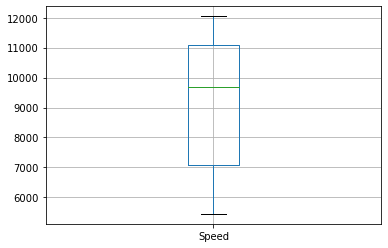

In [139]:
df_gp.boxplot()

# Função probabilidade
O objetivo deste bloco é extrair informações do dataset a partir da análise de variáveis discretas

In [140]:
gen_infos = pd.DataFrame({'Generation': df['Generation'], 'Attack': df['Attack']})
gen_infos

,Generation,Attack
495,4,85
230,2,10
658,5,50
486,4,80
359,3,100
...,...,...
429,3,180
71,1,50
428,3,150
315,3,90


In [141]:
gen_infos = gen_infos.groupby('Generation').sum()
gen_infos

,Attack
Generation,
1,12722
2,7635
3,13060
4,10027
5,13541
6,6216


X: poder de attack. Aplicação de F(X = x) para descobrir as porcentagens equivalentes à soma total do poder de ataque de cada geração.

In [168]:
porcentagens: float = []

n = gen_infos['Attack'].sum()
print('Porcentagens:')
for i in range(1, 7):
    gen_infos['Attack'][i] = round((gen_infos['Attack'][i] / n), 4)
    porcentagens.append(round((gen_infos['Attack'][i] * 100), 1))
    print(f'[{i}°]', porcentagens[i - 1])

gen_infos

Porcentagens:
[1°] 20.1
[2°] 12.1
[3°] 20.7
[4°] 15.9
[5°] 21.4
[6°] 9.8


,Attack
Generation,
1,0.2013
2,0.1208
3,0.2066
4,0.1587
5,0.2143
6,0.0984


Aqui podemos ver que a maior concentração de poder de ataque está na geração 3, com aproximadamente 20.7% do total de todos os pokemons. Ou seja, se selecionarmos dois pokemons, um da geração 3 e outro de outra, é mais provável que o pokémon da 3° geração tenha mais pontos de ataque do que o pokémon da outra geração. 